In [ ]:
#Import packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [4]:
#Read data

train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)

#set features and target

x_train1 = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

In [5]:
#Define continuous and categorical variables

cont =['LotFrontage', 'LotArea', 'MasVnrArea', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath']

cat = list(set(x_train1.columns) - set(cont))

#make sure categorical vars are strings
x_train1[cat] = x_train1[cat].astype(str)
test[cat] = test[cat].astype(str)

#Encode categorical

le = LabelEncoder()

x_train2= pd.DataFrame()
test2= pd.DataFrame() #For use later

for i in cat:
    x_train2[i] = le.fit_transform(x_train1[i])
    test2[i] = le.fit_transform(test[i])

#merge encoded and continuous variables
x_train2 = np.concatenate((x_train2, x_train1[cont]), axis=1)
test2 = np.concatenate((test2, test[cont]), axis=1)

columnNames  = cat + cont
x_train2 = pd.DataFrame(x_train2, columns = columnNames)
test2 = pd.DataFrame(test2, columns = columnNames)

#Remove NaN with 0
x_train2.fillna(0, inplace=True)
test2.fillna(0, inplace=True)

0.8462632439431157

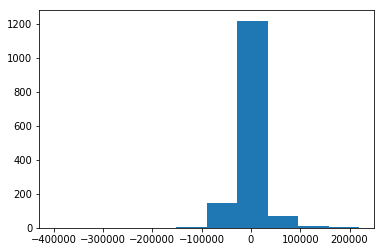

In [6]:
#get R^2 with multiple linear

lm = LinearRegression()
lm.fit(x_train2, y_train)
residuals = y_train - lm.predict(x_train2)
plt.hist(residuals)

lm.score(x_train2, y_train) #0.8462

In [7]:
#look at multicollinearity with VIF

vif = {'factor': [], 'features': []}

for i in range(x_train2.shape[1]):
    factor = variance_inflation_factor(x_train2.values, i)
    
    if factor <= 5:
        vif['factor'].append(factor)
        vif['features'].append(x_train2.columns[i])
        
features = x_train2[vif['features']]

/home/sofiawangy/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [8]:
#Get R^2 with non redundant vars from VIF above

lm.fit(features, y_train)
lm.score(features, y_train) #0.529, pretty low

0.5294461348830034

In [9]:
#Check mulitcollinearity with ANOVA

x = sm.add_constant(x_train2)
results = sm.OLS(y_train, x).fit()
print(results.summary())

/home/sofiawangy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


ValueError: The indices for endog and exog are not aligned

In [ ]:
#get R^2 with train test split on x_train

In [ ]:
#random forest

In [ ]:
#gradient boosting